In [1]:
## load additional data
## see ?f1_grid and ?f1_laptime for the details
require(dyRank)
require(tidyverse)
require(knitr)
data("f1_grid", package = "dyRank")
data("f1_laptime", package = "dyRank")

## prepare data
f1_all <- bind_rows(f1_race, f1_grid, f1_laptime)
f1_laptime

Loading required package: dyRank

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: knitr



Pos,driver,Car,year,race,race_id,GP,rank_type
<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Alain Prost,McLaren TAG,1984,races,466,brazil,fastest-laps
2,Derek Warwick,Renault,1984,races,466,brazil,fastest-laps
3,Patrick Tambay,Renault,1984,races,466,brazil,fastest-laps
4,Elio de Angelis,Lotus Renault,1984,races,466,brazil,fastest-laps
5,Niki Lauda,McLaren TAG,1984,races,466,brazil,fastest-laps
6,Keke Rosberg,Williams Honda,1984,races,466,brazil,fastest-laps
7,Michele Alboreto,Ferrari,1984,races,466,brazil,fastest-laps
8,Nigel Mansell,Lotus Renault,1984,races,466,brazil,fastest-laps
9,Eddie Cheever,Alfa Romeo,1984,races,466,brazil,fastest-laps


In [2]:
## fit hierarhcal model
set.seed(2018)
fit_hier <- hdyRank(
    data       = f1_all,
    var_rank   = "Pos",           
    var_player = "driver",
    var_match  = "GP",
    var_time   = "year",
    var_rank_type = "rank_type",
    driver_fix = "Fernando Alonso",
    mcmc = 200, burnin = 10, thin = 10,
    truncation = 10
)

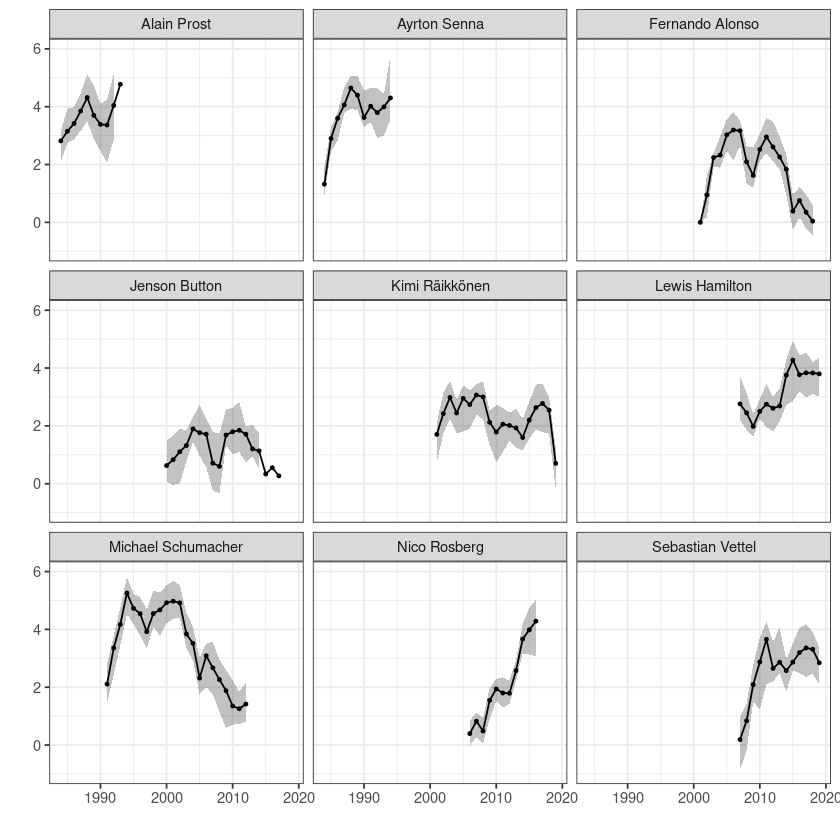

In [3]:
rating_hier <- get_rating(fit_hier)

drivers_use <- c("Kimi Räikkönen","Fernando Alonso","Jenson Button","Nico Rosberg","Lewis Hamilton","Sebastian Vettel","Michael Schumacher","Ayrton Senna","Alain Prost")

gg <- plot_rating(rating_hier, facet = TRUE, ncol = 3, driver_name = drivers_use)
gg + ylim(-1, 6) + xlim(1984, 2019)


In [4]:
drivers_multichamp <- c("Michael Schumacher","Ayrton Senna","Alain Prost","Lewis Hamilton")
multichamp <- plot_rating(rating,facet = TRUE, ncol = 2, driver_name = drivers_multichamp)
multichamp + ylim(-1, 6) + xlim(1980, 2019)

ERROR: Error in "dyRank.fit" %in% class(obj): object 'rating' not found


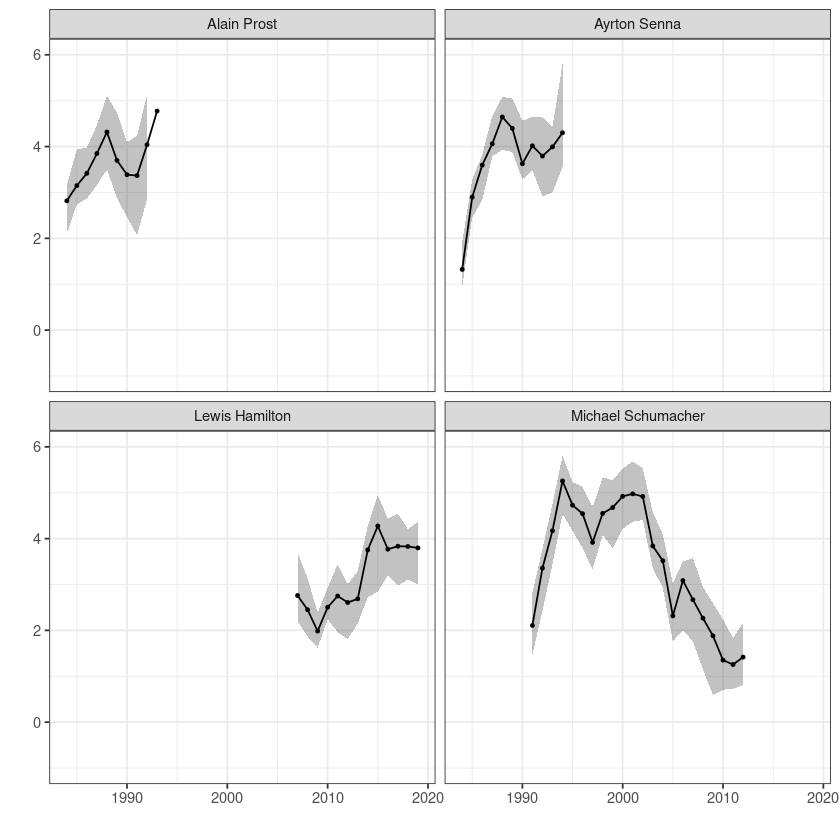

In [6]:
rating_hier <- get_rating(fit_hier)

drivers_use <- c("Michael Schumacher","Ayrton Senna","Alain Prost","Lewis Hamilton")

gg <- plot_rating(rating_hier, facet = TRUE, ncol = 2, driver_name = drivers_use)
gg + ylim(-1, 6) + xlim(1984, 2019)
